変換スペクトルの最小MCDエポック数:99
エポック数:300
Min_Epoch_cvIndex:[ 99 121 102  59 145 134 100 120  88  90  62 105 148  87 158]
Min_Epoch_cosimIndex:[283 269 272 290 275 274 247 300 273 267]


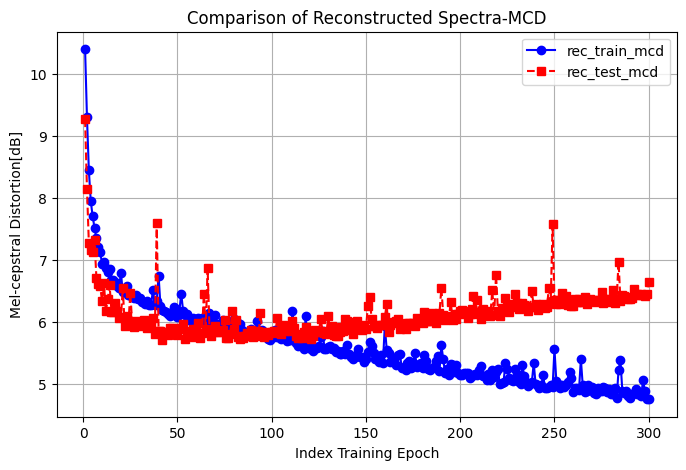

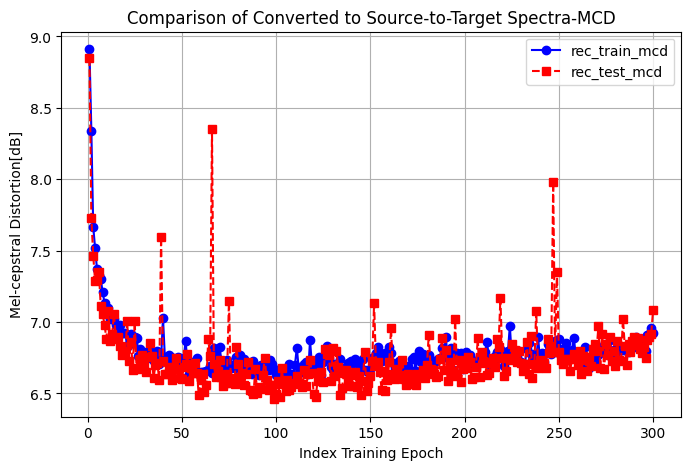

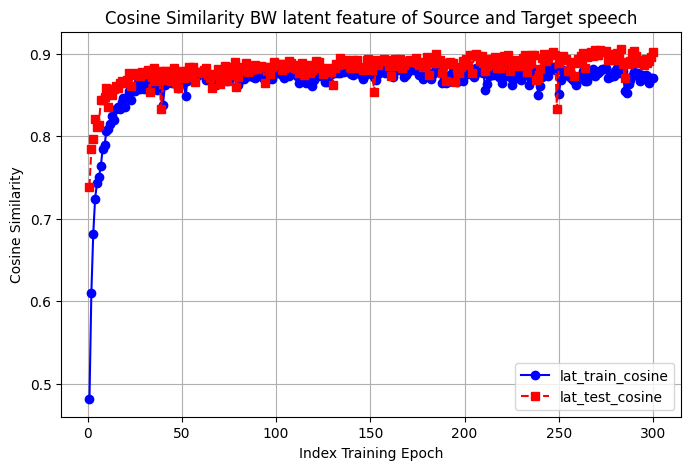

In [60]:
'''
Copyright 2019 Patrick Lumban Tobing (Nagoya University)
Modified and Improved by Katou , 2025
Apache 2.0  (http://www.apache.org/licenses/LICENSE-2.0)
'''

import os
import re
import matplotlib.pyplot as plt
import numpy as np
working_dir = "/cyclevae-vc/egs/one-to-one"
os.chdir(working_dir)

##############################################
#　　以下、自分のlogパスに書き換えてください。　 #
#############################################

source_file="exp/tr50_22.05k_cyclevae_gauss_bone_src-air_trg_hl1_hu1024_ld16_ks3_ds2_cyc3_lr1e-4_bs80_wd0.0_do0.5_epoch180_bsu1_bsue1/log/bone_src-air_trg.log"
file_path = "cycvae_gauss_50mcep_16lat_3cyc_bone-air_batch1.txt"

min_idx=0
min_val15=9999.9
min_val5=9999.9
epoch_sum=0
with open(file_path, 'w',encoding='utf-8') as f:
    with open(source_file, 'r', encoding='utf-8') as infile:
        for line in infile:
            # 行末の改行や余分な空白を除去
            line = line.strip()
            # 空行はスキップ
            if not line:
                continue
                
            if "average evaluation" in line:
                elements = line.split()

                str1 = elements[0].split(")")
                str2 = str1[0].split(":")
                idx = str2[1]
                idx_out= idx+":"
                out_36="(+- " + elements[36]
                out_40="(+- " + elements[40]
                out_61="(+- " + elements[61]
                out_65="(+- " + elements[65]
                epoch_sum += 1
                f.write(" ".join([idx_out,tmp_trn1,tmp_trn2,"dB",tmp_trn3,"dB",",",
                                  tmp_trn4,tmp_trn5,"dB",tmp_trn6_out,tmp_trn7,"dB",tmp_trn8_out,",",
                                  tmp_trn9,tmp_trn10,";",
                                  tmp_trn11,tmp_trn12,"dB",tmp_trn13,"dB",",",
                                  tmp_trn14,tmp_trn15,"dB",tmp_trn16_out,tmp_trn17,"dB",tmp_trn18_out,",",
                                  tmp_trn19,tmp_trn20,";;",
                                  elements[20],elements[21],"dB",elements[23],"dB",",",
                                  elements[32],elements[33],"dB",out_36,elements[37],"dB",out_40,",",
                                  elements[42],elements[43],";",
                                  elements[45],elements[46],"dB",elements[48],"dB",",",
                                  elements[57],elements[58],"dB",out_61,elements[62],"dB",out_65,",",
                                  elements[67],elements[68],";;"]) + "\n")
                #ソース話者から、ターゲット話者へ変換したときのMCDが最小となるEPOCHを選択
                if float(elements[58]) + float(elements[33]) <= float(min_val15)+float(min_val5):
                    min_idx=idx
                    min_val1=elements[20]
                    min_val2=elements[21]
                    min_val3=elements[23]
                    min_val4=elements[32]
                    min_val5=elements[33]
                    min_val6=elements[36]
                    min_val7=elements[37]
                    min_val8=elements[40]
                    min_val9=elements[42]
                    min_val10=elements[43]
                    min_val11=elements[45]
                    min_val12=elements[46]
                    min_val13=elements[48]
                    min_val14=elements[57]
                    min_val15=elements[58]
                    min_val16=elements[61]
                    min_val17=elements[62]
                    min_val18=elements[65]
                    min_val19=elements[67]
                    min_val20=elements[68]
                    min_trn1=tmp_trn1
                    min_trn2=tmp_trn2
                    min_trn3=tmp_trn3
                    min_trn4=tmp_trn4
                    min_trn5=tmp_trn5
                    min_trn6=tmp_trn6
                    min_trn7=tmp_trn7
                    min_trn8=tmp_trn8
                    min_trn9=tmp_trn9
                    min_trn10=tmp_trn10
                    min_trn11=tmp_trn11
                    min_trn12=tmp_trn12
                    min_trn13=tmp_trn13
                    min_trn14=tmp_trn14
                    min_trn15=tmp_trn15
                    min_trn16=tmp_trn16
                    min_trn17=tmp_trn17
                    min_trn18=tmp_trn18
                    min_trn19=tmp_trn19
                    min_trn20=tmp_trn20

            elif "average optimization" in line:
                elements = line.split()

                tmp_trn1=elements[20]
                tmp_trn2=elements[21]
                tmp_trn3=elements[23]
                tmp_trn4=elements[32]
                tmp_trn5=elements[33]
                tmp_trn6=elements[36]
                tmp_trn6_out=tmp = "(+- " + tmp_trn6 + ")"
                tmp_trn7=elements[37]
                tmp_trn8=elements[40]
                tmp_trn8_out=tmp = "(+- " + tmp_trn8 + ")"
                tmp_trn9=elements[42]
                tmp_trn10=elements[43]
                tmp_trn11=elements[45]
                tmp_trn12=elements[46]
                tmp_trn13=elements[48]
                tmp_trn14=elements[57]
                tmp_trn15=elements[58]
                tmp_trn16=elements[61]
                tmp_trn16_out=tmp = "(+- " + tmp_trn16
                tmp_trn17=elements[62]
                tmp_trn18=elements[65]
                tmp_trn18_out=tmp = "(+- " + tmp_trn18
                tmp_trn19=elements[67]
                tmp_trn20=elements[68]
        print(f"変換スペクトルの最小MCDエポック数:{min_idx}")
        print(f"エポック数:{epoch_sum}")
#mcdの評価データ
tr_trg_trg_mcd=[]
tr_trg_src_mcd=[]
tr_src_src_mcd=[]
tr_src_trg_mcd=[]

ts_trg_trg_mcd=[]
ts_trg_src_mcd=[]
ts_src_src_mcd=[]
ts_src_trg_mcd=[]

#1epochで2つの発話内容からコサイン類似度を評価しているので、trgsrcとsrctrgでは潜在空間が変わる。
tr_trg_src_cosim=[]
tr_src_trg_cosim=[]
#----examle----
#exp:trgsrcでは、0032の発話
ts_trg_src_cosim=[]
#exp:srctrgでは、0076の発話
ts_src_trg_cosim=[]


with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        columns = re.split(r'\s+', line.strip())  # 空白で分割
        if not columns[0].startswith("#"):
            tr_trg_trg_mcdnum=(float(columns[2])+float(columns[4]))/2
            tr_trg_src_mcdnum=(float(columns[8])+float(columns[12]))/2
            tr_src_src_mcdnum=(float(columns[21])+float(columns[23]))/2
            tr_src_trg_mcdnum=(float(columns[27])+float(columns[31]))/2
            
            ts_trg_trg_mcdnum=(float(columns[40])+float(columns[42]))/2
            ts_trg_src_mcdnum=(float(columns[46])+float(columns[50]))/2
            ts_src_src_mcdnum=(float(columns[59])+float(columns[61]))/2
            ts_src_trg_mcdnum=(float(columns[65])+float(columns[69]))/2
            
            tr_trg_src_cosimnum=float(columns[18])
            tr_src_trg_cosimnum=float(columns[37])
            
            ts_trg_src_cosimnum=float(columns[56])
            ts_src_trg_cosimnum=float(columns[75])
            
            
            tr_trg_trg_mcd.append(tr_trg_trg_mcdnum)
            tr_trg_src_mcd.append(tr_trg_src_mcdnum)
            tr_src_src_mcd.append(tr_src_src_mcdnum)
            tr_src_trg_mcd.append(tr_src_trg_mcdnum)
            
            ts_trg_trg_mcd.append(ts_trg_trg_mcdnum)
            ts_trg_src_mcd.append(ts_trg_src_mcdnum)
            ts_src_src_mcd.append(ts_src_src_mcdnum)
            ts_src_trg_mcd.append(ts_src_trg_mcdnum)
            
            tr_trg_src_cosim.append(tr_trg_src_cosimnum)
            tr_src_trg_cosim.append(tr_src_trg_cosimnum)
            
            ts_trg_src_cosim.append(ts_trg_src_cosimnum)
            ts_src_trg_cosim.append(ts_src_trg_cosimnum)
            
rec_tr_mcd=(np.array(tr_trg_trg_mcd)+np.array(tr_src_src_mcd))/2
rec_ts_mcd=(np.array(ts_trg_trg_mcd)+np.array(ts_src_src_mcd))/2

cv_st_tr_mcd=(np.array(tr_trg_src_mcd)+np.array(tr_src_trg_mcd))/2
cv_st_ts_mcd=(np.array(ts_trg_src_mcd)+np.array(ts_src_trg_mcd))/2

lat_tr_cosim=(np.array(tr_trg_src_cosim)+np.array(tr_src_trg_cosim))/2
lat_ts_cosim=(np.array(ts_trg_src_cosim)+np.array(ts_src_trg_cosim))/2
            
arrlen=len(rec_tr_mcd)+1
x = np.arange(1, arrlen)

Min_Epoch_cvIndex=np.argsort(cv_st_ts_mcd)
Min_Epoch_cosimIndex=np.argsort(lat_ts_cosim)[::-1]
print(f"Min_Epoch_cvIndex:{Min_Epoch_cvIndex[:15] +1}")
print(f"Min_Epoch_cosimIndex:{Min_Epoch_cosimIndex[:10] +1}")
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.plot(x, rec_tr_mcd, marker="o", linestyle="-", color="b", label="rec_train_mcd")
plt.plot(x, rec_ts_mcd, marker="s", linestyle="--", color="r", label="rec_test_mcd") 

# 軸ラベル、タイトル
plt.xlabel("Index Training Epoch")  
plt.ylabel("Mel-cepstral Distortion[dB]")  
plt.title("Comparison of Reconstructed Spectra-MCD")

plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(8, 5))
plt.plot(x, cv_st_tr_mcd, marker="o", linestyle="-", color="b", label="rec_train_mcd")
plt.plot(x, cv_st_ts_mcd, marker="s", linestyle="--", color="r", label="rec_test_mcd") 

# 軸ラベル、タイトル
plt.xlabel("Index Training Epoch")  
plt.ylabel("Mel-cepstral Distortion[dB]")  
plt.title("Comparison of Converted to Source-to-Target Spectra-MCD")

plt.legend()
plt.grid(True)

plt.show()

plt.figure(figsize=(8, 5))
plt.plot(x, lat_tr_cosim, marker="o", linestyle="-", color="b", label="lat_train_cosine")
plt.plot(x, lat_ts_cosim, marker="s", linestyle="--", color="r", label="lat_test_cosine") 

# 軸ラベル、タイトル
plt.xlabel("Index Training Epoch")  
plt.ylabel("Cosine Similarity")  
plt.title("Cosine Similarity BW latent feature of Source and Target speech")

plt.legend()
plt.grid(True)

plt.show()
